# Results wPCC VCT

In [1]:
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = True
#%load_ext kedro.ipython

[02/24/25 15:39:01] INFO     Resolved project path as: /home/maa/dev/PHD.                           ]8;id=39719;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=141093;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/frame ]8;id=550767;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=936351;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             work/startup.py:99: KedroDeprecationWarning: project_version in                       
                             pyproject.toml is deprecated, use kedro_init_version instead                          
                               warnings.warn(                                                                      
                                                                                                                   

[02/24/25 15:39:01] WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/pa ]8;id=489688;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=73154;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             rtitioned_dataset.py:200: KedroDeprecationWarning:                                    
                             'PartitionedDataset' has been moved to `kedro-datasets` and will be                   
                             removed in Kedro 0.19.0.                                                              
                               warnings.warn(                                                                      
                                                                                                                   

[02/24/25 15:39:02] WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/pa ]8;id=741048;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=423756;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             rtitioned_dataset.py:200: KedroDeprecationWarning:                                    
                             'PartitionedDataset' has been moved to `kedro-datasets` and will be                   
                             removed in Kedro 0.19.0.                                                              
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project phd                                                      ]8;id=227940;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=29967;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=18553;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=35930;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

[02/24/25 15:39:03] INFO     Registered line magic 'run_viz'                                        ]8;id=473649;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=783421;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
import numpy as np
import yaml

from vessel_manoeuvring_models.visualization.plot import track_plot, plot
from phd.visualization.plot_ship import track_plots
from vessel_manoeuvring_models.prime_system import PrimeSystem
from phd.visualization.plot_prediction import plot_total_force, plot_force_components, predict, plot_compare_model_forces, plot_parameter_contributions, group_parameters, joined_parameter_contributions, same_ylims
from vessel_manoeuvring_models.symbols import *
import matplotlib.pyplot as plt
from vessel_manoeuvring_models.substitute_dynamic_symbols import run, lambdify, remove_functions, prime
from vessel_manoeuvring_models.parameters import df_parameters
p = df_parameters["symbol"]
import sympy as sp
from sympy import Eq, symbols, latex
from phd.pipelines.load_wPCC.nodes import preprocess,zigzag_angle
from phd.pipelines.resimulate_with_autopilot.nodes import simulate_closed_loop, postprocess
from phd.visualization.plot_vct import plot_VCT, flat_keys, plot_VCT_components

import paper
from phd.visualization.styles import styles
from phd.visualization.units import units
from phd.visualization.symbols import symbols
from phd.pipelines.regression_VCT.nodes import mirror, add_mirrored
from phd.pipelines.regression_VCT.nodes import subtract_centripetal_and_Coriolis
import matplotlib.ticker as plticker
from sklearn.metrics import mean_squared_error, r2_score
from phd.pipelines.regression_VCT.nodes import mirror, add_mirrored
import matplotlib.patches as mpatches 
from phd.visualization.circle_drift import plot_3d_circle_drift, predict_circle_drift_matrix, plot_3d_circle_drift_matplotlib

In [3]:
ship_name = "optiwise"

In [4]:
#%reload_kedro
loaders={}
#loaders = {f"polynomial rudder {name}":loader for name,loader in catalog.load(f"{ship_name}.models_VCT_polynomial_rudder").items()}
#loaders["semiempirical rudder"] = catalog.load(f"{ship_name}.models_VCT")['semiempirical_covered_inertia']
loaders["MMG_quadratic"] = catalog.load(f"{ship_name}.models_VCT_MMG_rudder_MDL")["quadratic"]
loaders["MMG_original"] = catalog.load(f"{ship_name}.models_VCT_MMG_rudder_MDL")["original"]
#loaders.pop('polynomial rudder complex')  # for now...

[02/24/25 15:39:27] WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/pa ]8;id=364959;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=177257;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             rtitioned_dataset.py:200: KedroDeprecationWarning:                                    
                             'PartitionedDataset' has been moved to `kedro-datasets` and will be                   
                             removed in Kedro 0.19.0.                                                              
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/__ ]8;id=874518;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=124594;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             init__.py:44: KedroDeprecationWarning: 'AbstractDataSet' has been                     
                             renamed to 'AbstractDataset', and the alias will be removed in Kedro                  
                             0.19.0                                                                                
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Loading data from 'optiwise.models_VCT_MMG_rudder_MDL'             ]8;id=486281;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=384697;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PartitionedDataset)...                                                               

                    INFO     Loading data from 'optiwise.models_VCT_MMG_rudder_MDL'             ]8;id=230192;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=935864;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PartitionedDataset)...                                                               

In [5]:
models = {name:loader() for name,loader in loaders.items()}

In [6]:
#model = models['polynomial rudder simple']
#model = models["MMG_rudder"]
model = models["MMG_quadratic"]

In [7]:
#df_VCT = catalog.load(f"{ship_name}.df_VCT_all_raw")['M5139-02-A_MS.df_VCT']()
#(df_VCT['fx'] - df_VCT['fx_rudders'] - df_VCT['fx_hull'] - model.parameters['Xthrustport']*df_VCT['thrust'])

In [8]:
df_VCT = catalog.load(f"{ship_name}.df_VCT_scaled")

                    INFO     Loading data from 'optiwise.df_VCT_scaled' (CSVDataSet)...         ]8;id=678945;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=905812;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
assert ((df_VCT['Y_D'] - df_VCT['Y_R'] - df_VCT['Y_H']).abs() < 10**-10).all()
assert ((df_VCT['N_D'] - df_VCT['N_R'] - df_VCT['N_H']).abs() < 10**-10).all()
assert ((df_VCT['X_D'] - df_VCT['X_R'] - df_VCT['X_P'] - df_VCT['X_H']).abs() < 10**-10).all()

In [10]:
df_VCT = catalog.load(f"{ship_name}.df_VCT_scaled")
mask = df_VCT['V'] > 0.9
df_VCT = df_VCT.loc[mask].copy()
#df_VCT = add_mirrored(df_VCT)
df_VCT['beta_deg'] = np.rad2deg(df_VCT['beta'])

#df_VCT = model.prime(data=df_VCT)
mask = df_VCT['test type'] == 'Rudder angle resistance (no propeller)'
df_VCT = df_VCT.loc[~mask].copy()


df_VCT['beta_deg'] = np.rad2deg(df_VCT['beta'])

df_VCT = subtract_centripetal_and_Coriolis(df_VCT=df_VCT, model=model)

                    INFO     Loading data from 'optiwise.df_VCT_scaled' (CSVDataSet)...         ]8;id=664260;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=689583;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [11]:
_ = []

for name, model_ in models.items():

    df_VCT_predict = predict(model_, data=df_VCT, main_equation_excludes=['X_W','Y_W','N_W'])
        
    for dof in ['X','Y','N']:
        for suffix in ['D','H','R']:
            key = f"{dof}_{suffix}"
    
            score=pd.Series()
            score['dof'] = dof
            score['suffix'] = suffix
            score['model'] = name
            #score['value'] = mean_absolute_error(y_true=df_VCT[key], y_pred=df_VCT_predict[key])
            score['value'] = r2_score(y_true=df_VCT[key], y_pred=df_VCT_predict[key])
            _.append(score)

scores = pd.DataFrame(_)

In [12]:
scores

dof suffix          model     value
0    X      D  MMG_quadratic  0.314987
1    X      H  MMG_quadratic  0.541572
2    X      R  MMG_quadratic -3.272259
3    Y      D  MMG_quadratic  0.999050
4    Y      H  MMG_quadratic  0.995783
5    Y      R  MMG_quadratic  0.989117
6    N      D  MMG_quadratic  0.998614
7    N      H  MMG_quadratic  0.990458
8    N      R  MMG_quadratic  0.989122
9    X      D   MMG_original  0.324283
10   X      H   MMG_original  0.541572
11   X      R   MMG_original -3.287656
12   Y      D   MMG_original  0.997455
13   Y      H   MMG_original  0.995783
14   Y      R   MMG_original  0.970608
15   N      D   MMG_original  0.995730
16   N      H   MMG_original  0.990458
17   N      R   MMG_original  0.969417

In [13]:
styles['polynomial rudder simple'] = styles['polynomial rudder']
styles['polynomial rudder complex'] = {'style':'m-','label':'complex'}

In [14]:
def get_colors(names):
    colors = []
    for name in names:
        style= styles[name]
        color = style.get('color',style['style'][0])
        colors.append(color)

    return colors

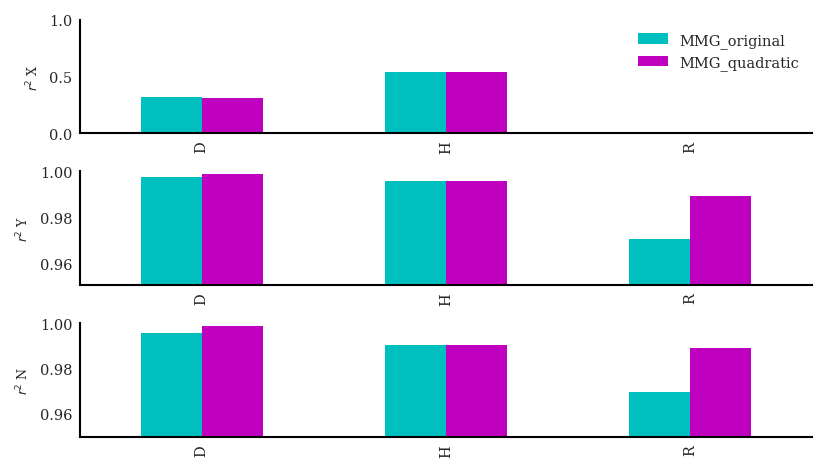

In [15]:
fig,axes = plt.subplots(nrows=3)
for (dof, group),ax in zip(scores.groupby(by='dof', sort=False),axes):
    #group.plot.bar(x='suffix', y='value',ax=ax)
    pivot = group.pivot(columns='model', index='suffix') 
    colors = get_colors(names=pivot['value'].columns)
    pivot.plot.bar(y='value',color=colors,ax=ax)
    
    ax.get_legend().set_visible(False)
    ax.set_xlabel('')
    ax.set_ylim(np.max([0,group['value'].min()-0.02]),1)
    ax.set_ylabel(fr"$r^2$ {dof}")

axes[0].legend()

In [16]:
df_prediction = predict(model=model, data=df_VCT)

if 'Y_RHI' in df_prediction:
    df_prediction['Y_H']+=df_prediction['Y_RHI']

if 'N_RHI' in df_prediction:
    df_prediction['N_H']+=df_prediction['N_RHI']



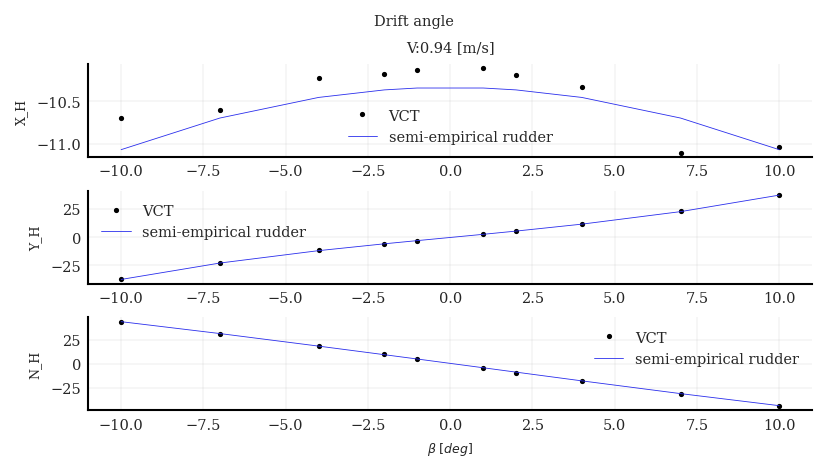

In [17]:
predictions = {
    "semiempirical rudder" : df_prediction,
}

plot_VCT(df_VCT=df_VCT, predictions=predictions, y_keys = ['X_H', 'Y_H', 'N_H'], test_type='Drift angle', styles=styles);

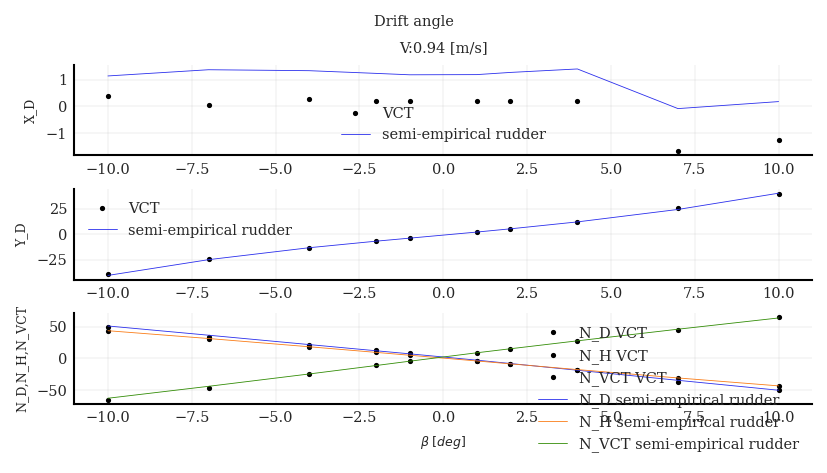

In [18]:
plot_VCT(df_VCT=df_VCT, predictions=predictions, y_keys=['X_D', 'Y_D', ['N_D','N_H','N_VCT']], test_type='Drift angle', styles=styles);

In [19]:
#df_VCT['X_P'] = df_VCT['thrust']

In [20]:
#df_prediction['X_H']+=df_prediction['thrust']*(1-model.parameters['Xthrustport'])

In [21]:
#df_prediction['X_D']+=df_prediction['thrust']*(1-model.parameters['Xthrustport'])

In [22]:
model.subsystems['hull'].equations['X_H']

Eq(X_H, X_{0} + X_{rr}*r**2 + X_{u}*u + X_{vr}*r*v + X_{vv}*v**2)

In [23]:
color_palette = ['k','c','r','m']
colors={}
for dof in ['X','Y','N']:
    color_all = color_palette.copy()
    for subscript in ['D','H','R','P']:
        key = f"{dof}_{subscript}"
        colors[key] = color_all.pop(0)
        

In [24]:
df_VCT['test type'].unique()


array(['Circle', 'Circle + Drift', 'Circle + Drift + rudder angle',
       'Circle + rudder angle', 'Drift angle', 'Rudder and drift angle',
       'Rudder angle', 'Thrust variation', 'self propulsion'],
      dtype=object)

[02/24/25 15:39:30] WARNING  /tmp/ipykernel_49249/1234614213.py:35: MatplotlibDeprecationWarning:   ]8;id=350101;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=218804;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             An artist whose label starts with an underscore was passed to                         
                             legend(); such artists will no longer be ignored in the future.  To                   
                             suppress this warning, explicitly filter out such artists, e.g. with                  
                             `[art for art in artists if not art.get_label().startswith('_')]`.                    
                               fig.axes[0].legend(handles=patches, loc='upper center',                             
                             bbox_to_anchor=(0.5, 1.62), ncol=3)                                                   
                                                                                                                   

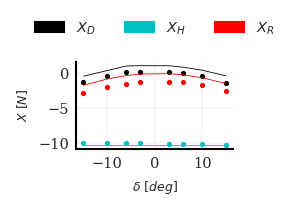

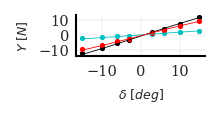

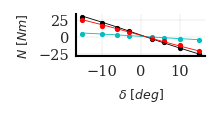

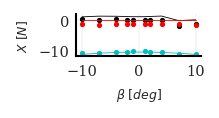

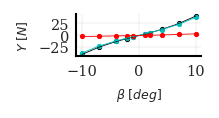

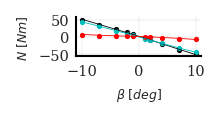

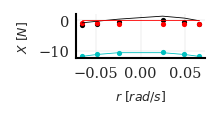

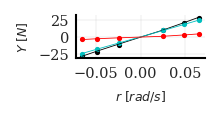

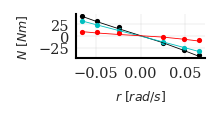

In [25]:

dofs={
    'X':{
        'y_label':r'$X$ $[N]$',
        'y_keys':['X_D','X_H','X_R'],
    },
    'Y':{
        'y_label':r'$Y$ $[N]$',
        'y_keys':['Y_D','Y_H','Y_R'],
    },
    'N':{
        'y_label':r'$N$ $[Nm]$',
        'y_keys':['N_D','N_H','N_R'],
    },
    
}

test_types = [
    'Rudder angle',
    'Drift angle',
    'Circle',
    #'Thrust variation',
             ]
first=True
for test_type in test_types:
    for dof, meta_data in dofs.items():
    
        fig = plot_VCT_components(df_VCT=df_VCT, df_prediction=df_prediction, y_keys=[meta_data['y_keys'],], test_type=test_type, 
                            colors=colors);
        #fig.axes[0].legend(loc='upper center', bbox_to_anchor=(0.50, 1.05), ncol=4)
        #if first:
        if first:
            labels = [line.get_label() for line in fig.axes[0].lines]
            colors_ = [line.get_color() for line in fig.axes[0].lines]
            patches = [mpatches.Patch(color=colors_[i], label=label) for i,label in enumerate(labels)]
            fig.axes[0].legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, 1.62), ncol=3)
            first = False
            #fig.tight_layout()
        else:
            fig.axes[0].get_legend().set_visible(False)
        
        fig.axes[0].set_ylabel(meta_data['y_label'])
        fig.set_size_inches(paper.figure_width/4, paper.figure_height/4)
        fig.suptitle('')
        fig.axes[0].set_title('')
        test_name = test_type.lower().replace(' ','_')
        file_name = f"{test_name}_{dof}"
        paper.save_fig(fig,f"{file_name}.svg")

In [26]:
#mask = ((df_VCT['delta'] == 0))
#df = df_VCT.loc[mask]
df = df_VCT.groupby('test type').get_group('Circle + Drift')
df = df.groupby('r').filter(lambda x:len(x) > 1)

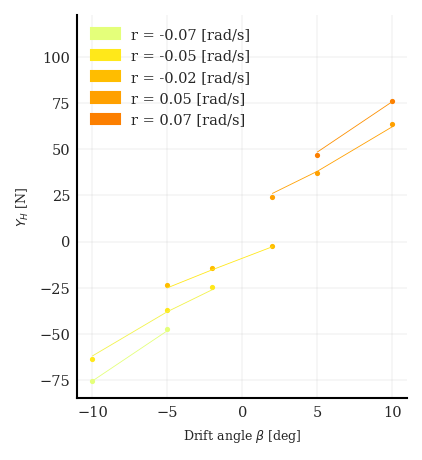

In [27]:
fig = plot_VCT(df_VCT=df, predictions=predictions, y_keys=['Y_H',], test_type='Circle + Drift', styles=styles);

labels = [f"r = {r_:0.2f} [rad/s]" for r_ in sorted(df['r'].unique())]
colors = [line.get_color() for line in fig.axes[0].lines]
patches = [mpatches.Patch(color=colors[i], label=label) for i,label in enumerate(labels)]

fig.axes[0].legend(labels, handles=patches)
fig.axes[0].set_xlabel(r'Drift angle $\beta$ [deg]')
fig.axes[0].set_ylabel(r'$Y_H$ [N]')
fig.axes[0].set_title('')
fig.suptitle('')
fig.set_size_inches(paper.figure_width/2,paper.figure_height)
paper.save_fig(fig,"circle_drift_Y_H.svg")

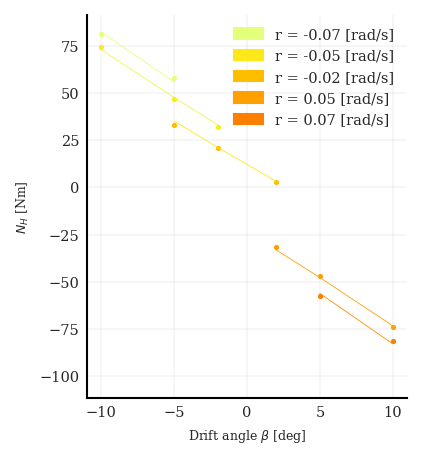

In [28]:

fig = plot_VCT(df_VCT=df, predictions=predictions, y_keys=['N_H',], test_type='Circle + Drift', styles=styles);

labels = [f"r = {r_:0.2f} [rad/s]" for r_ in sorted(df['r'].unique())]
colors = [line.get_color() for line in fig.axes[0].lines]
patches = [mpatches.Patch(color=colors[i], label=label) for i,label in enumerate(labels)]
fig.axes[0].legend(labels, handles=patches)

fig.axes[0].set_xlabel(r'Drift angle $\beta$ [deg]')
fig.axes[0].set_ylabel(r'$N_H$ [Nm]')
fig.axes[0].set_title('')
fig.suptitle('')
fig.set_size_inches(paper.figure_width/2,paper.figure_height)
paper.save_fig(fig,"circle_drift_N_H.svg")

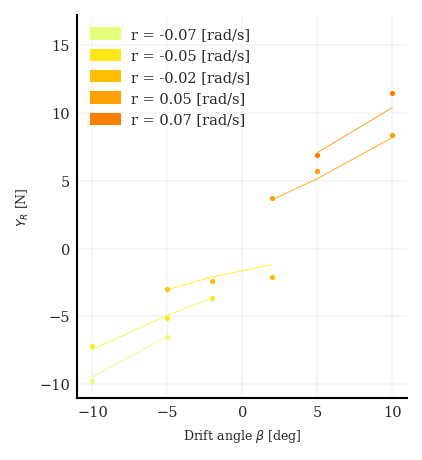

In [29]:
fig = plot_VCT(df_VCT=df, predictions=predictions, y_keys=['Y_R',], test_type='Circle + Drift', styles=styles);

labels = [f"r = {r_:0.2f} [rad/s]" for r_ in sorted(df['r'].unique())]
colors = [line.get_color() for line in fig.axes[0].lines]
patches = [mpatches.Patch(color=colors[i], label=label) for i,label in enumerate(labels)]

fig.axes[0].legend(labels, handles=patches)
fig.axes[0].set_xlabel(r'Drift angle $\beta$ [deg]')
fig.axes[0].set_ylabel(r'$Y_R$ [N]')
fig.axes[0].set_title('')
fig.suptitle('')
fig.set_size_inches(paper.figure_width/2,paper.figure_height)
#paper.save_fig(fig,"circle_drift_Y_H.svg")

In [30]:
mask = df_VCT['test type'].isin([
    'Cirlce',
    'Drift angle',
    'Circle + Drift',
])

df = df_VCT.loc[mask]

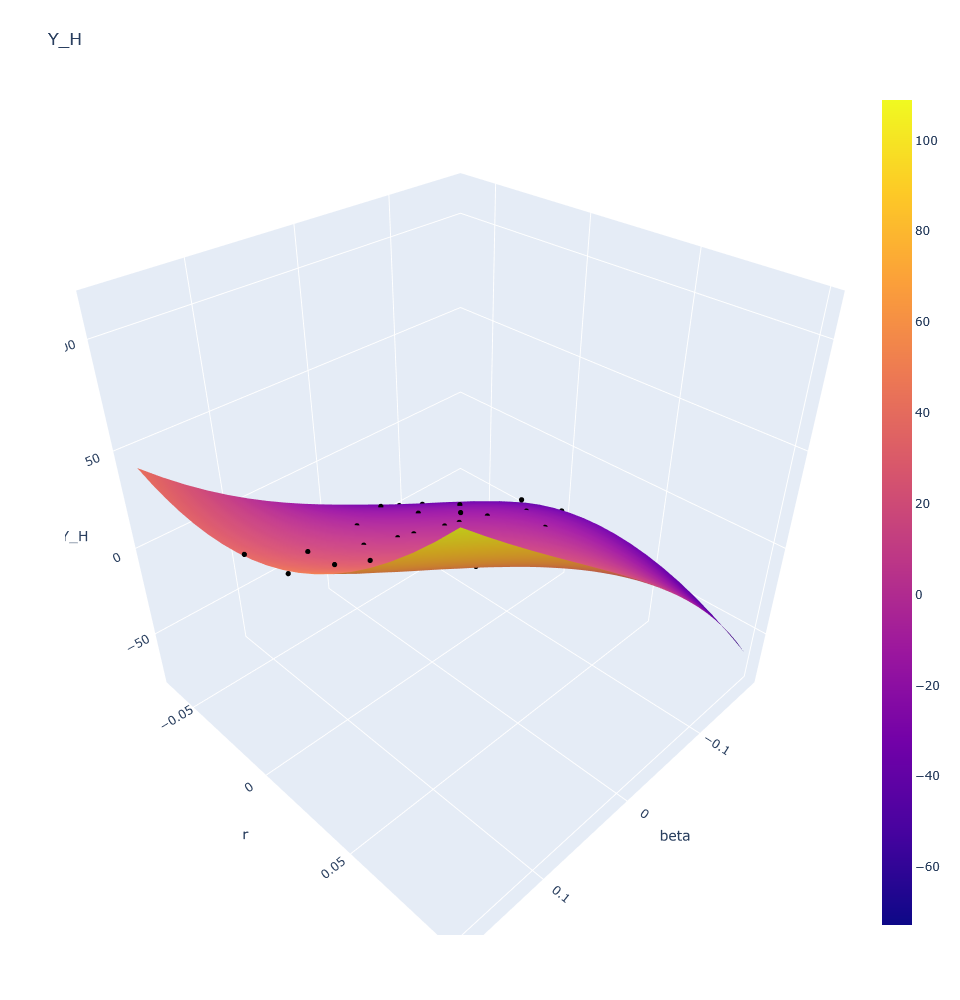

In [31]:
plot_3d_circle_drift(df=df, model=model)

In [32]:
model2 = model.copy()

In [33]:
model2.parameters['Yvrr'] = 0
model2.parameters['Yvvr'] = 0
model2.parameters['Nvvr'] = 0
model2.parameters['Nvrr'] = 0

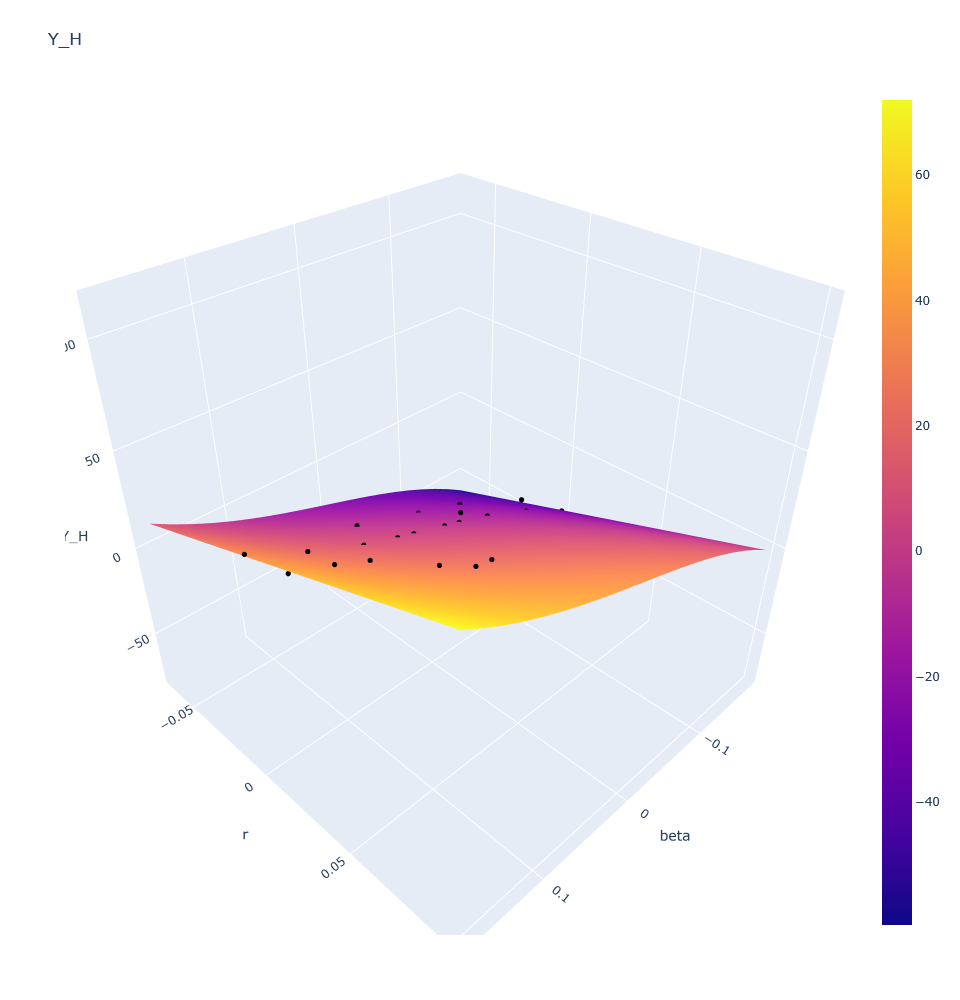

In [34]:
plot_3d_circle_drift(df=df, model=model2)

In [35]:
result = predict_circle_drift_matrix(df=df, model=model)
result['beta_deg'] = np.rad2deg(result['beta'])

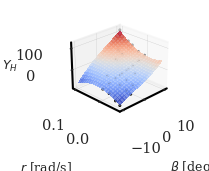

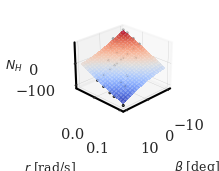

In [36]:
azim=225
fig = plot_3d_circle_drift_matplotlib(df=df, model=model, key='Y_H', azim=azim);
fig.set_size_inches(paper.figure_width/3,paper.figure_height/3)
paper.save_fig(fig,'Y_H.svg')

fig = plot_3d_circle_drift_matplotlib(df=df, model=model, key='N_H', azim=45);
fig.set_size_inches(paper.figure_width/3,paper.figure_height/3)
paper.save_fig(fig,'N_H.svg')


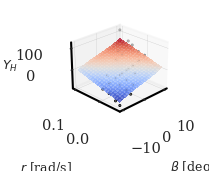

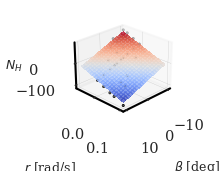

In [37]:
azim=225
fig = plot_3d_circle_drift_matplotlib(df=df, model=model2, key='Y_H', azim=azim);
fig.set_size_inches(paper.figure_width/3,paper.figure_height/3)
paper.save_fig(fig,'Y_H_no_coupling.svg')

fig = plot_3d_circle_drift_matplotlib(df=df, model=model2, key='N_H', azim=45);
fig.set_size_inches(paper.figure_width/3,paper.figure_height/3)
paper.save_fig(fig,'N_H_no_coupling.svg')

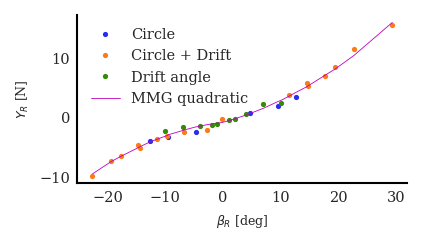

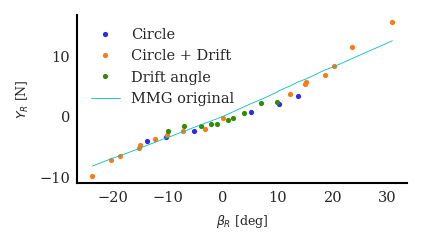

In [38]:
predictions = {}

for name, model_ in models.items():
    
    l_R = model_.parameters['l_R']
    L = model_.ship_parameters['L']
    df_VCT['beta_R'] = df_VCT['beta'] - l_R/L * df_VCT['r']/(df_VCT['U']/L)
    df_VCT['beta_R_deg'] = np.rad2deg(df_VCT['beta_R'])
    
    df_prediction_ = predict(model=model_, data=df_VCT)
    predictions[name] = df_prediction_
    
    df_prediction_['beta_R_deg'] = np.rad2deg(df_prediction_['beta_R'])
    
    mask = df_prediction_['test type'].isin([
        'Drift angle',
        'Circle',
        'Circle + Drift', 
    ])
    df_prediction_select = df_prediction_.loc[mask].copy()
    
    mask = df_VCT['test type'].isin([
        'Drift angle',
        'Circle',
        'Circle + Drift', 
    ])
    df_VCT_select = df_VCT.loc[mask].copy()
    
    
    key = 'Y_R'
    x_key = 'beta_R_deg'
    
    
    fig,ax=plt.subplots()
    for test_type, group in df_VCT_select.groupby(by='test type'):
        
        the_plot = group.sort_values(by=x_key).plot(x=x_key,y=key, style='.', label=f"{test_type}", ax=ax)
    
    df_prediction_select.sort_values(by=x_key).plot(x=x_key,y=key, style=styles.get(name)['style'], label=styles.get(name)['label'], ax=ax)
    
    y_label = symbols.get(key,key)
    ax.set_xlabel(fr'$\beta_R$ [deg]')
    ax.set_ylabel(fr'${y_label}$ [N]')
    
    #ax.grid()

    fig.set_size_inches(paper.figure_width/2,paper.figure_height/2)

    paper.save_fig(fig,f'Y_R_{name}.svg')

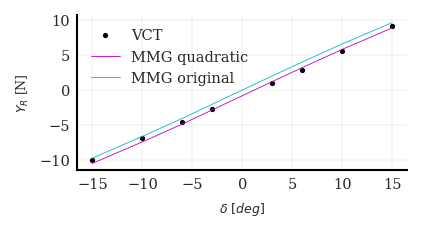

In [39]:
fig = plot_VCT(df_VCT, y_keys=['Y_R'], predictions=predictions, test_type='Rudder angle', styles=styles);
fig.suptitle('')
fig.axes[0].set_title('')
fig.axes[0].set_ylabel(r'$Y_R$ [N]')
fig.set_size_inches(paper.figure_width/2,paper.figure_height/2)
paper.save_fig(fig,"rudder_angle.svg")

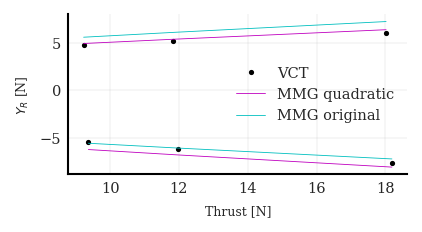

In [40]:
fig = plot_VCT(df_VCT, y_keys=['Y_R'], predictions=predictions, test_type='Thrust variation', styles=styles);
fig.suptitle('')
fig.axes[0].set_title('')
fig.axes[0].set_ylabel(r'$Y_R$ [N]')
fig.axes[0].set_xlabel(r'Thrust [N]')
fig.set_size_inches(paper.figure_width/2,paper.figure_height/2)
paper.save_fig(fig,"thrust_variation.svg")

In [41]:
df_parameters.loc['Nrdot','brix']

-1.0*pi*T**2*(0.017*B*CB/T - 0.0033*B/L + 0.0833)/L**2